<a href="https://colab.research.google.com/github/ajaykumar080286/DeepLearning/blob/master/RegularizationL2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons

import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import Adam

from mlxtend.plotting import plot_decision_regions


In [8]:
X,y=make_moons(n_samples=100, noise=0.25, random_state=3)

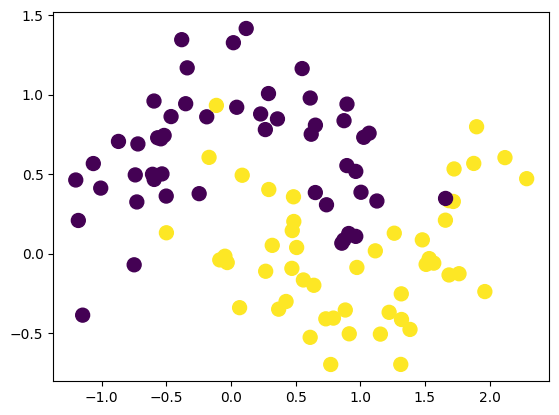

In [10]:
plt.scatter(X[:,0], X[:,1],c=y,s=100)

**Without Regularization**

In [12]:
model=Sequential()

model.add(Dense(128, activation='relu', input_dim=2))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
adam=Adam(learning_rate=0.01)

In [14]:
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
history=model.fit(X,y,epochs=1500, validation_split=0.2,verbose=0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step


<Axes: >

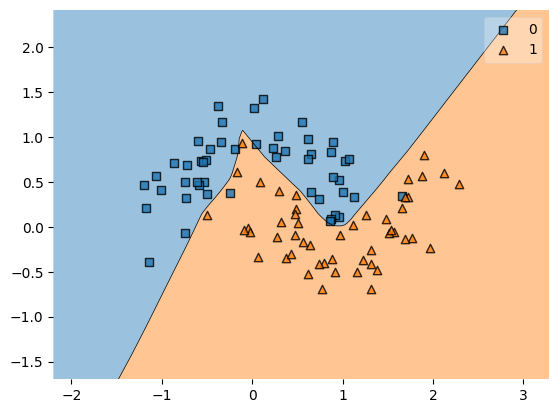

In [17]:
plot_decision_regions(X,y ,clf=model)
plt.xlim(-2,3)
plt.ylim(-1.5,2)

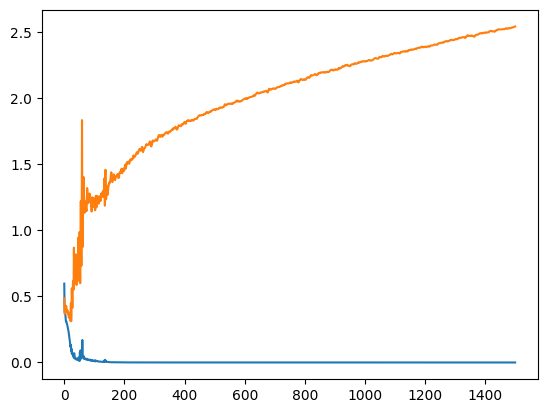

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

**Regularization**

In [26]:
model1=Sequential()

model1.add(Dense(128, activation='relu', input_dim=2, kernel_regularizer=keras.regularizers.L2(0.001)))
#model1.add(Dense(128, activation='relu', input_dim=2, kernel_regularizer=keras.regularizers.L1(0.001)))

model1.add(Dense(128, activation='relu',kernel_regularizer=keras.regularizers.L2(0.001)))
#model1.add(Dense(128, activation='relu',kernel_regularizer=keras.regularizers.L1(0.001)))

model1.add(Dense(1, activation='sigmoid'))

model1.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
adam = Adam(learning_rate=0.01)

model1.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

In [30]:
history=model1.fit(X,y,epochs=1500, validation_split=0.2,verbose=0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


(-1.5, 2.0)

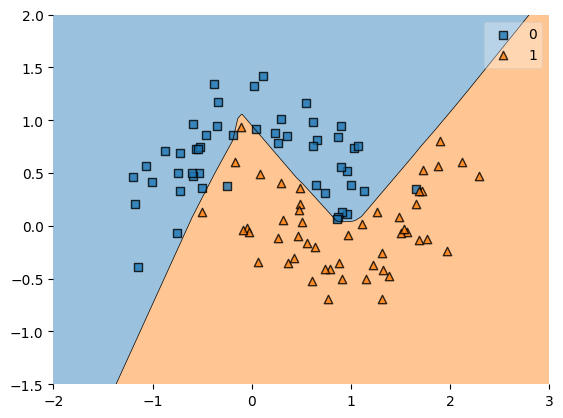

In [31]:
plot_decision_regions(X,y ,clf=model1)
plt.xlim(-2,3)
plt.ylim(-1.5,2)

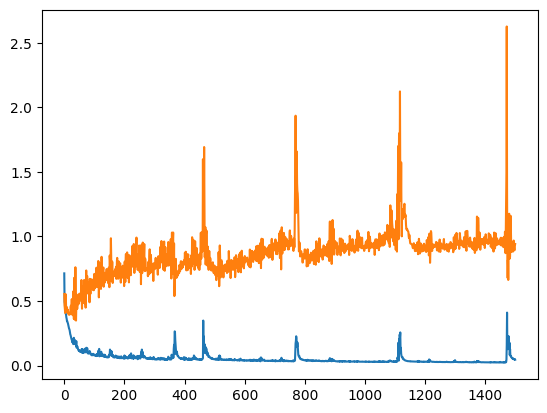

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [37]:
model_weights=model.get_weights()[0].reshape(256)
model1_weights=model1.get_weights()[0].reshape(256)

In [38]:
model_weights

array([ 1.01928096e-02,  1.73100471e-01, -3.13407749e-01, -8.15892778e-03,
       -2.90846199e-01,  4.98957902e-01, -1.96416676e-02,  9.66535229e-03,
       -2.99947053e-01,  2.13748261e-01,  4.06637996e-01, -5.67691587e-02,
       -2.63824314e-01,  1.39760286e-01, -3.98204505e-01,  4.04471785e-01,
        2.11228400e-01,  1.70210168e-01,  2.32456531e-02,  4.26309794e-01,
       -9.00119126e-01,  3.07935029e-01,  1.55754909e-01, -3.89168054e-01,
       -2.13983521e-01,  1.56789273e-01,  4.39039953e-02,  3.76003385e-01,
       -1.10682881e+00,  3.45181584e-01, -3.13283771e-01,  7.17911124e-03,
       -3.34595472e-01,  6.51324540e-02, -3.62633467e-01,  2.84292519e-01,
        5.30726723e-02,  4.47512358e-01,  4.19745743e-02,  3.41058224e-01,
        4.70743120e-01, -1.64934509e-02,  3.35977346e-01,  1.47150517e-01,
       -1.12549588e-01, -3.10177267e-01,  3.17565769e-01,  2.22675819e-02,
       -2.85292596e-01, -3.22855473e-01, -1.22947479e-02,  1.56328186e-01,
       -2.26484835e-01, -

In [39]:
model1_weights

array([ 4.48576391e-01,  5.59365690e-01, -1.10152696e-15, -9.41636955e-08,
       -1.47359935e-03,  2.49150906e-35,  4.37642664e-01, -3.63075468e-34,
        2.93620001e-03,  3.33433427e-34,  4.32612658e-01, -7.37544324e-04,
        5.69053486e-36,  8.76607723e-04, -1.33572507e+00, -1.59668546e-34,
        1.68840206e-32,  9.06959664e-12,  2.80033337e-19, -3.86527843e-34,
        2.00970098e-03, -6.04013866e-03, -2.50441289e-26, -2.36640917e-03,
        4.63824630e-01, -2.81516502e-28,  6.95357919e-01, -3.66019964e-01,
        2.17508791e-34, -3.85879910e-24,  1.07961334e-03, -3.01497151e-34,
       -2.33389926e-23,  6.81322954e-36,  3.64151153e-15, -2.20333674e-34,
        1.96727573e-20, -1.45883138e-26,  1.49606677e-19, -3.96683720e-33,
       -3.09379939e-05,  3.18439165e-03, -1.49517786e-03, -3.12705487e-02,
        4.92226936e-05,  1.19594752e-08,  8.56345919e-21,  4.15271632e-02,
        1.04554021e-09,  1.56264210e-35, -4.43746285e-06, -1.62079856e-01,
        7.80486047e-01,  

<Axes: >

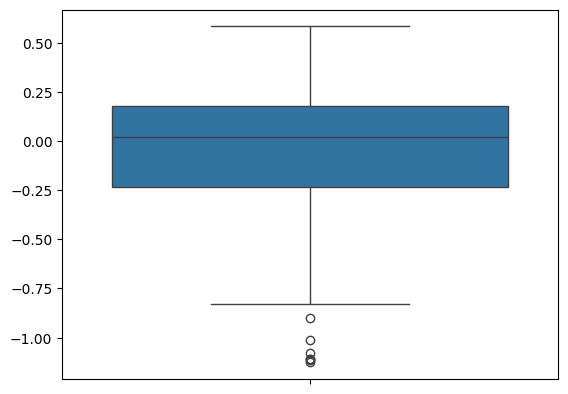

In [40]:
sns.boxplot(model_weights)

<Axes: >

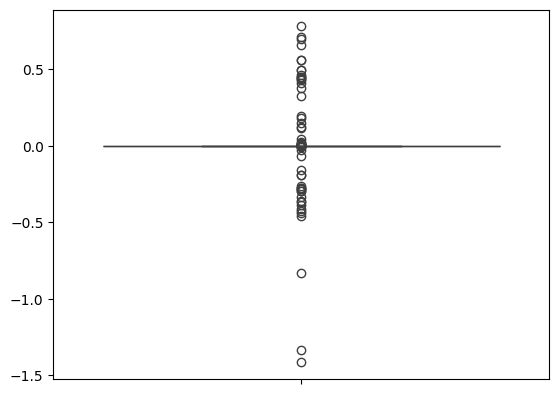

In [41]:
sns.boxplot(model1_weights)

/tmp/ipython-input-3985994680.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model_weights)
/tmp/ipython-input-3985994680.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model1_weights)


<Axes: ylabel='Density'>

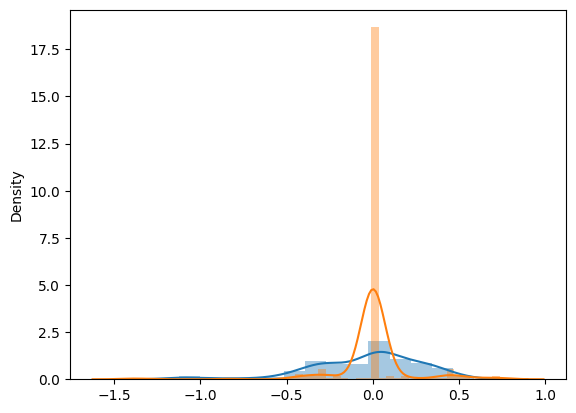

In [45]:
sns.distplot(model_weights)
sns.distplot(model1_weights)
